In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv('flights_NY.csv')

In [3]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


In [4]:
# Исходно строк
df.shape[0]

336776

In [5]:
# Строк после очистки
df = df.dropna()
df.shape[0]

327346

In [6]:
"""
Задание 1. По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной и
нарисуйте график, показывающий распределение этой вероятности по авиакомпаниям.
"""
carriers = sorted(df['carrier'].unique())


In [7]:
delaysCount = {"carriers": [], "probability": []}
for carrier in carriers:
    carrierFlights = df.loc[df['carrier'] == carrier]
    carriersFlightsDelayed = carrierFlights.loc[carrierFlights['arr_delay'] > 0]
    delaysCount["carriers"].append(carrier)
    delaysCount["probability"].append(carriersFlightsDelayed.shape[0] / carrierFlights.shape[0])


print(delaysCount)

{'carriers': ['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV'], 'probability': [0.38377471955591536, 0.3351175384230131, 0.26657263751763044, 0.43680734148642897, 0.34439128792647616, 0.4790639430226188, 0.5756240822320118, 0.5968503937007874, 0.28362573099415206, 0.4670287973798778, 0.3448275862068966, 0.38458343428749436, 0.3705814129393374, 0.34128225175918686, 0.44038525406841583, 0.4742647058823529]}


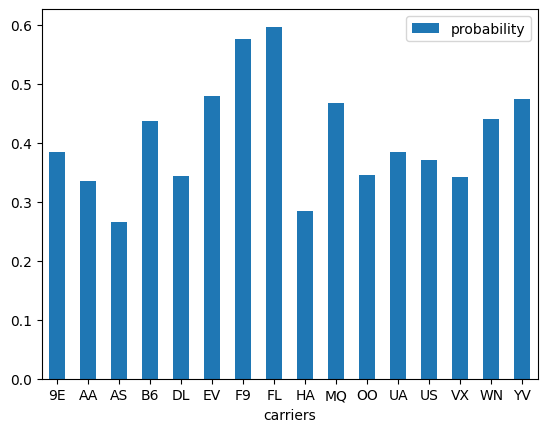

In [8]:
# Построим диаграмму
delayProbability = pd.DataFrame(delaysCount)
ax = delayProbability.plot.bar(x='carriers', y='probability', rot=0)

array([[<Axes: title={'center': 'distance'}>]], dtype=object)

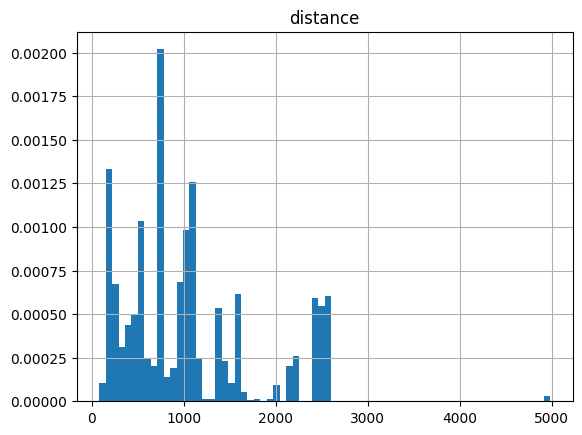

In [10]:
"""
Задание 2. Постройте гистограмму расстояния перелета distance.
Выделите на ней три группы перелетов: короткие, средние и длинные.
Какие значения distance разумно выбрать в качестве границы, разделяющей короткие.
средние и длинные перелеты? Куда летят самолеты в группе длинных перелетов?
Найдите среднее время задержки вылета в каждой из трех выделенных групп.
"""
df.hist(column='distance', bins=70, density=True)

In [ ]:
# Короткие дистанции < 1200 миль
# Средние дистанции от 1200 до 2500 миль
# Длинные дистанции > 2500 миль

In [11]:
longDistanceFlights = df.loc[df['distance'] > 2500]
print(longDistanceFlights['dest'].unique())

['SFO' 'HNL' 'SJC' 'OAK' 'SMF' 'ANC']


In [12]:
print("Long distance flights delay:", longDistanceFlights['arr_delay'].mean())
print("Medium distance flights delay:", df.loc[(df['distance'] > 1200) & (df['distance'] < 2500)]['arr_delay'].mean())
print("Short distance flights delay:", df.loc[df['distance'] < 1200]['arr_delay'].mean())


Long distance flights delay: 2.684278089318289
Medium distance flights delay: 2.682179597796509
Short distance flights delay: 8.496193246490451


In [13]:
"""
3 задание. Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на
нем границы доверительных интервалов с уровнем доверия 0.95.
С помощью подходящего статистического теста проверьте, можно ли принять гипотезу
 о равенстве средних в январе и феврале на уровне значимости 0.05?
На уровне значимости 0.01?
"""
delaysByMonth = {"month": list(range(1, 13)), "delay": []}
for month in range(1, 13):
    delaysByMonth["delay"].append(df.loc[df['month'] == month]['arr_delay'].mean())

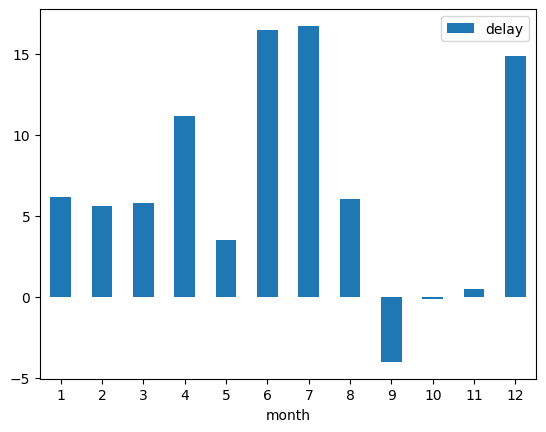

In [14]:
delay = pd.DataFrame(delaysByMonth)
ax = delay.plot.bar(x='month', y='delay', rot=0)

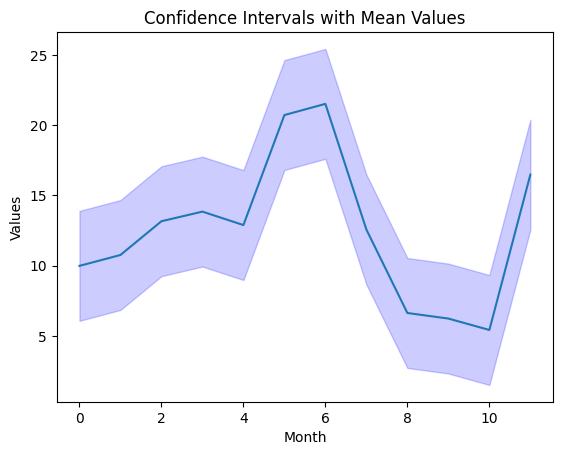

In [15]:
grouped_delays = df.groupby('month')['dep_delay'].mean().reset_index()
grouped_delays.columns = ['month', 'average_delay_time']

std_error = stats.sem(grouped_delays.average_delay_time)

lower_bound = grouped_delays.average_delay_time - std_error  *  stats.t.ppf((1 + 0.975) / 2, len(grouped_delays.average_delay_time) - 1)
upper_bound = grouped_delays.average_delay_time + std_error  *  stats.t.ppf((1 + 0.975) / 2, len(grouped_delays.average_delay_time) - 1)

# Создаем график
plt.plot(grouped_delays.average_delay_time, label='Mean values')

# Добавляем границы доверительных интервалов
plt.fill_between(range(len(grouped_delays.average_delay_time)), lower_bound, upper_bound, alpha=0.2, color='blue')

# Подписываем оси
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Confidence Intervals with Mean Values')

# Показываем график
plt.show()

In [16]:
grouped_delays.head()

,month,average_delay_time
0,1,9.985491
1,2,10.760239
2,3,13.164289
3,4,13.849187
4,5,12.891709


In [17]:
january_data = grouped_delays.loc[grouped_delays['month'] == 1]['average_delay_time']
february_data = grouped_delays.loc[grouped_delays['month'] == 2]['average_delay_time']
t_stat, p_value = stats.ttest_ind(january_data, february_data)
if p_value > 0.05:
    print("При уровне значимости 0.05 гипотеза о равенстве средних принимается.")
else:
    print("При уровне значимости 0.05 гипотеза о равенстве средних отвергается.")

# Проверяем гипотезу на уровне значимости 0.01
t_stat, p_value = stats.ttest_ind(january_data, february_data, alternative='less')
if p_value > 0.01:
    print("При уровне значимости 0.01 гипотеза о равенстве средних принимается.")
else:
    print("При уровне значимости 0.01 гипотеза о равенстве средних отвергается.")

При уровне значимости 0.05 гипотеза о равенстве средних отвергается.
При уровне значимости 0.01 гипотеза о равенстве средних отвергается.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


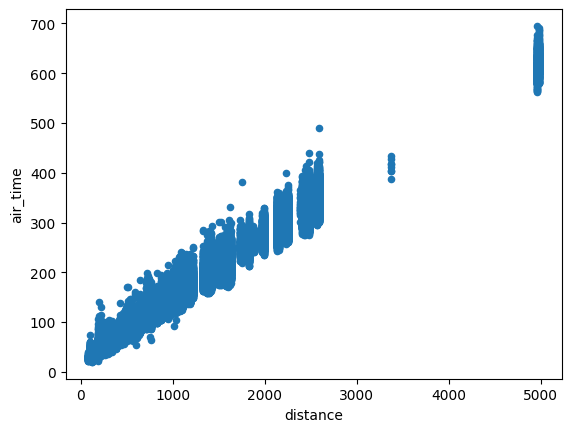

In [19]:
""" 4 задание. Найдите коэффициент корреляции между расстоянием distance и временем полета air_time.
Постройте точечную диаграмму в осях distance (х) и air_time (y).
Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график.
Как можно интерпретировать смысл коэффициентов полученной линейной модели?
"""
ax1 = df.plot.scatter(x='distance', y='air_time')

In [ ]:
# Коэффициент корреляции
df[["distance", "air_time"]].corr(method='pearson')


,distance,air_time
distance,1.00000,0.99065
air_time,0.99065,1.00000


In [20]:
# Метод наименьших квадратов
x_sum = 0
squared_x_sum = 0
y_sum = 0
x_y_sum = 0
N = df.shape[0]
for x, y in zip(df['distance'], df['air_time']):
    x_sum += x
    squared_x_sum += x ** 2
    y_sum += y
    x_y_sum += x * y
# Используем правило Крамера
det = (squared_x_sum * N) - (x_sum ** 2)
det_a = (x_y_sum * N) - (x_sum * y_sum)
a = det_a / det

det_b = (squared_x_sum * y_sum) - (x_y_sum * x_sum)
b = det_b / det
print(f"Коэффициенты линейной регрессии y = ax + b: {a}, {b}")

Коэффициенты линейной регрессии y = ax + b: 0.12611932467386067, 18.46657812776041


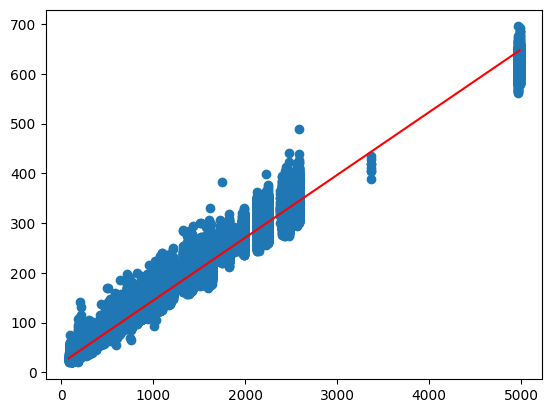

In [21]:
x = list(range(df["distance"].min(), df["distance"].max()))
plt.plot(x, [a*el + b for el in x], color="red")
plt.scatter(df["distance"], df["air_time"])
plt.show()

In [ ]:
"""
Объясним смысл коэффициентов линейной регрессии: коэффициент наклона ≈ 0.12,
таким образом при увеличении дистанции рейса, например, на 100 миль время рейса увеличится на 12 минут.
То есть, средняя скорость самолета ≈ 500 миль/ч.
В случае если, дистанция рейса = 0 миль, значение линейной регрессии 0.12 * 0 + 18 = 18 минут.
Наверняка это связано с тем, что самолёт не взлетает мгновенно, а ещё проводится инструктаж,
выезд на взлётно-посадочную полосу и тд.
"""

In [22]:
""" Задание 5. Постройте нормированную гистограмму распределения задержки прилета по
тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании.
Сделайте предположение о том, каким распределением может описываться полученная
гистограмма, оцените параметры этого распределения и нанесите график плотности
на график с гистограммой.
"""

# Фильтруем задержку вылета в диапазоне [-15; 15]
df = df.loc[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]
df = df.reset_index(drop=True)

Text(0, 0.5, '% полётов')

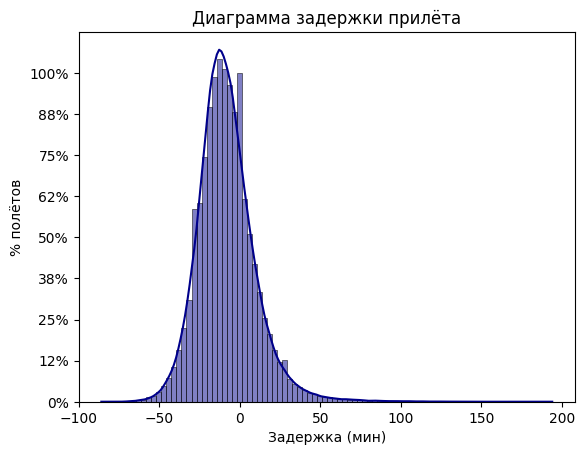

In [23]:
# Диаграмма
sns.histplot(df['arr_delay'], kde=True,
             bins=int(180/2), color = 'darkblue')
# Процентное форматирование
plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
# Оси
plt.title('Диаграмма задержки прилёта')
plt.xlabel('Задержка (мин)')
plt.ylabel('% полётов')

In [24]:
# Вычисляем параметры распределения
m = df['arr_delay'].mean().round(2)
v = df['arr_delay'].var().round(2)

In [28]:
print(f"График напоминает нормальное распределение с матожиданием {m}, дисперсией {v} (мин)")

График напоминает нормальное распределение с матожиданием -8.25, дисперсией 320.67 (мин)


In [29]:
""" Задание 6. Постройте модель логистической регрессии, которая будет предсказывать, что задержка прилета составит более 15 минут.
Какие признаки вы будете использовать?
Какие новые признаки, на основе имеющихся, можете предложить?
Какова точность полученной модели (precision, recall, accuracy)?
"""

' Задание 6. Постройте модель логистической регрессии, которая будет предсказывать, что задержка прилета составит более 15 минут.\nКакие признаки вы будете использовать?\nКакие новые признаки, на основе имеющихся, можете предложить?\nКакова точность полученной модели (precision, recall, accuracy)?\n'

In [30]:
""" Для построения модели логистической регрессии мною было принято решение использовать все признаки, за исключением:

1) dep_time, arr_time, так как время вылета в общем случае не будет влиять на задержку
2) arr_delay, значения данного столбца были преобразованы в arr_delay_binary (0, если задержка меньше 15 минут, 1 в противном случае) и использованы как ответы на задачу
3) tailnum
4) day, year, так как данные значения не должны играть существенной роли, в отличие от месяца (в разные месяцы в среднем разная погода, что может сказаться на задержках)
5) flight, origin, dest. Опять же, данные не играют роли.

Из новых признаков предлагаю реализовать arr_delay_binary, описанную выше. Также можно было добавить признак time_of_day, так как, возможно, в разные временные промежутки дня статистика будет меняться.
"""

' Для построения модели логистической регрессии мною было принято решение использовать все признаки, за исключением:\n\n1) dep_time, arr_time, так как время вылета в общем случае не будет влиять на задержку\n2) arr_delay, значения данного столбца были преобразованы в arr_delay_binary (0, если задержка меньше 15 минут, 1 в противном случае) и использованы как ответы на задачу\n3) tailnum\n4) day, year, так как данные значения не должны играть существенной роли, в отличие от месяца (в разные месяцы в среднем разная погода, что может сказаться на задержках)\n5) flight, origin, dest. Опять же, данные не играют роли.\n\nИз новых признаков предлагаю реализовать arr_delay_binary, описанную выше. Также можно было добавить признак time_of_day, так как, возможно, в разные временные промежутки дня статистика будет меняться.\n'

In [31]:
# Дополнительный импорт
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [34]:
# Заново загрузим датасет

df = pd.read_csv("flights_NY.csv")
df.dropna(inplace=True)

# Чтобы разделить все данные на 2 класса, добавлю новый столбец arr_delay_binary. Если задержка более 15 минут, значение будет 1, иначе 0
df['arr_delay_binary'] = (df['arr_delay'] > 15).astype(int)


df = df.drop('dep_time', axis=1)
df = df.drop('arr_time', axis=1)
df = df.drop('arr_delay', axis=1)
df = df.drop('tailnum', axis=1)
df = df.drop('day', axis=1)
df = df.drop('year', axis=1)
df = df.drop('flight', axis=1)
df = df.drop('origin', axis=1)
df = df.drop('dest', axis=1)

#Факторизирую значение столбца carrier
df['carrier'], uniques = pd.factorize(df['carrier'])

X = df.drop('arr_delay_binary', axis=1)
y = df['arr_delay_binary']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=85)

# Создание модели логистической регрессии
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)




Precision: 0.8893205120040757
Recall: 0.7206997987304536
Accuracy: 0.9126312059337464


In [35]:
""" Итого получили результаты:
  Precision: 0.8893205120040757
  Recall: 0.7206997987304536
  Accuracy: 0.9126312059337464
"""

' Итого получили результаты:\n  Precision: 0.8893205120040757\n  Recall: 0.7206997987304536\n  Accuracy: 0.9126312059337464\n'